
-----
#### MS: Unique patterns of mutations in childhood cancer highlight chemotherapy’s disease-defining role at relapse
### Main Figure 4
-----

In [293]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as patches
import seaborn as sns

import os
import sys

set2_cols = sns.color_palette("Set2")

-----
##### Set up input / output directories

In [294]:
## Provide an output directory for figures or use 'installation_folder/figures' directory
root_dir = os.path.dirname(os.getcwd())
fig_out = os.path.join(root_dir, 'figures')
## Or provide a results path
#fig_out = '/Users/dir1/dir2/Figures'

-----
##### Load helper scripts

In [295]:
sys.path.append(str(root_dir))
import scripts.utils as ut

-----
##### Load & prepare data 

In [296]:
## Load patients metadata
kzm611_md = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_md.tsv'), sep='\t', index_col=0)
low_samples = kzm611_md[kzm611_md.Burden=='low'].index.tolist()

In [297]:
kzm611_sigs = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_signatures.tsv'), sep='\t', index_col=0)
kzm611_sigs_low = kzm611_sigs.loc[low_samples].copy()
kzm611_sigs.shape, kzm611_sigs_low.shape

((611, 69), (577, 69))

In [298]:
thr_nov_sigs = ['SBS11', 'SBS17b', 'SBS31', 'SBS35', 'SBS87', 'SBS288L2', 'SBS288L3', 'SBS288L4', 'SBS288L5', 'SBS288H5']
thr_nhm_nov_sigs = ['SBS11', 'SBS17b', 'SBS31', 'SBS35', 'SBS87', 'SBS288L2', 'SBS288L3', 'SBS288L4', 'SBS288L5']
cos_plat_sbs = ['SBS31', 'SBS35']
cos_plat_sigs = ['SBS31', 'SBS35', 'DBS5']
all_plat_sbs = ['SBS31', 'SBS35', 'SBS288L5']
all_plat_sigs = ['SBS31', 'SBS35', 'SBS288L5', 'DBS5', 'DBS78H2']

cos_plat_sigs = ['SBS31', 'SBS35', 'DBS5']
plat_sigs = ['SBS31', 'SBS35', 'DBS5', 'DBS78H2', 'SBS288L5']
ncos_plat_sigs = ['DBS78H2', 'SBS288L5', 'DBS2', 'DBS6', 'ID3']
ncos1_plat_sigs = ['DBS78H2', 'SBS288L5', 'ID3']
ncos2_plat_sigs = ['DBS2', 'DBS6']
plat_enr_thr_sigs = ['SBS35', 'DBS78H2', 'SBS31', 'SBS288L5', 'DBS5', 'DBS2', 'DBS6', 'ID3']
plat_enr_thr_nonID = ['SBS35', 'DBS78H2', 'SBS31', 'SBS288L5', 'DBS5', 'DBS2', 'DBS6']
plat_enr_sbs = ['SBS35', 'SBS31', 'SBS288L5']
plat_enr_dbs = ['DBS78H2', 'DBS5', 'DBS2', 'DBS6']
plat_enr_id = ['ID3']


cos_plat_sbs = kzm611_sigs[['SBS31', 'SBS35']].copy()
cos_plat_all = kzm611_sigs[['SBS31', 'SBS35', 'DBS5']].copy()
all_plat_sigs = kzm611_sigs[plat_enr_thr_sigs].copy()
all_plat_sbs = kzm611_sigs[plat_enr_sbs].copy()
all_plat_dbs = kzm611_sigs[plat_enr_dbs].copy()
all_plat_id = kzm611_sigs[plat_enr_id].copy()

In [299]:
ncos_df = kzm611_sigs[ncos_plat_sigs].copy()
ncos_df['Total'] = ncos_df.sum(axis=1)

In [300]:
kzm_plat_df = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_plats_days_dose.txt'), sep='\t')
kzm_plat_df.head(2)

,Sample_id,Patient_id,Type,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,Oxaliplatin
0,KiCS0002_321321,KiCS0002,GCT,858,500.0,4200.0,0,Y,Y,N
1,KiCS0006_274243,KiCS0006,NBL,1154,400.0,0.0,0,Y,N,N


In [301]:
kzm_plat_df.shape

(141, 10)

In [302]:
kzm_plat_df['SBS'] = [kzm611_md.loc[x, 'SBS'] for x in kzm_plat_df.Sample_id]

scaler = MinMaxScaler()
kzm_plat_df.Cisplatin_dose = scaler.fit_transform(kzm_plat_df.Cisplatin_dose.values.reshape(-1,1)).flatten()
kzm_plat_df.Carboplatin_dose = scaler.fit_transform(kzm_plat_df.Carboplatin_dose.values.reshape(-1,1)).flatten()
kzm_plat_df.Oxaliplatin_dose = scaler.fit_transform(kzm_plat_df.Oxaliplatin_dose.values.reshape(-1,1)).flatten()

kzm_plat_df['Size'] = ((kzm_plat_df.Cisplatin_dose+kzm_plat_df.Carboplatin_dose+kzm_plat_df.Oxaliplatin_dose)/2) * 2000
#kzm_plat_df['Size'] = 500
kzm_plat_df['Days_log'] = np.log10(kzm_plat_df.Days_from+0.00000000001)
kzm_plat_df['SBS_log'] = np.log10(kzm_plat_df.SBS+0.00000000001)

kzm_plat_df.shape

(141, 14)

In [303]:
kzm_plat_df.head()

,Sample_id,Patient_id,Type,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,Oxaliplatin,SBS,Size,Days_log,SBS_log
0,KiCS0002_321321,KiCS0002,GCT,858,0.198413,0.636364,0.000000,Y,Y,N,15207,834.776335,2.933487,4.182044
1,KiCS0006_274243,KiCS0006,NBL,1154,0.158730,0.000000,0.000000,Y,N,N,3842,158.730159,3.062206,3.584557
2,KiCS0008_289185,KiCS0008,CRC,616,0.000000,0.000000,0.542986,N,N,Y,17184,542.986425,2.789581,4.235124
3,KiCS0010_270645,KiCS0010,OST,3,0.047619,0.000000,0.000000,Y,N,N,6761,47.619048,0.477121,3.830011
4,KiCS0010_270646,KiCS0010,OST,75,0.095238,0.000000,0.000000,Y,N,N,251,95.238095,1.875061,2.399674


In [316]:
all_plat_sigs_df = kzm_plat_df.copy()

all_plat_sigs_df['Platin_sig'] = ['Y' if x in all_plat_sigs.loc[(all_plat_sigs > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in all_plat_sigs_df.Sample_id]
all_plat_sigs_df['Platin_sbs'] = ['Y' if x in all_plat_sbs.loc[(all_plat_sbs > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in all_plat_sigs_df.Sample_id]
all_plat_sigs_df['Platin_dbs'] = ['Y' if x in all_plat_dbs.loc[(all_plat_dbs > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in all_plat_sigs_df.Sample_id]
all_plat_sigs_df['Platin_id'] = ['Y' if x in all_plat_id.loc[(all_plat_id > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in all_plat_sigs_df.Sample_id]


all_plat_sigs_df.rename(columns={'Type': 'Tumor'}, inplace=True)
all_plat_sigs_df['Total_drugs'] = all_plat_sigs_df.Cisplatin + all_plat_sigs_df.Carboplatin + all_plat_sigs_df.Oxaliplatin

all_plat_sigs_df['cos_total'] = [all_plat_sigs.loc[x, cos_plat_sigs].sum() for x in all_plat_sigs_df.Sample_id]
all_plat_sigs_df['nonCos_total'] = [all_plat_sigs.loc[x, ncos_plat_sigs].sum() for x in all_plat_sigs_df.Sample_id]

all_plat_sigs_df.tail(2)

,Sample_id,Patient_id,Tumor,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,Oxaliplatin,...,Size,Days_log,SBS_log,Platin_sig,Platin_sbs,Platin_dbs,Platin_id,Total_drugs,cos_total,nonCos_total
139,IID_H156418_T01_01_WG01,IID_H156418_T01,NBL,657,0.0,0.0,0.0,N,Y,N,...,0.0,2.817565,3.162564,Y,Y,N,N,NYN,262.0,255.0
140,IID_H158493_T01_01_WG01,IID_H158493_T01,OST,120,0.0,0.0,0.0,Y,N,N,...,0.0,2.079181,3.702172,Y,Y,Y,N,YNN,0.0,1258.0


In [317]:
all_plat_sigs.loc[x, cos_plat_sigs]

SBS31    10876.0
SBS35     4226.0
DBS5       152.0
Name: KiCS0002_321321, dtype: float64

In [305]:
topQuad = all_plat_sigs_df[(all_plat_sigs_df.SBS>1453) & (all_plat_sigs_df.Days_from>90)]
topQuad.to_csv(os.path.join(root_dir, 'source_data/KZM_topRightQuad.tsv'), sep='\t', index=None)

In [306]:
topr_quad = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_topRightQuad.tsv'), sep='\t', index_col=0)
topr_quad2 = pd.read_csv('/Users/mehdi/Documents/MyRepos/KiCS/data/KZM611_topRight_quad_v2.tsv', sep='\t', index_col=0)
topr_quad.Platin_sig.value_counts(), topr_quad2.Platin_sig.value_counts()

(Platin_sig
 Y    81
 N    30
 Name: count, dtype: int64,
 Platin_sig
 Y    70
 N    41
 Name: count, dtype: int64)

In [307]:
all_plat_md = all_plat_sigs_df.copy().set_index('Sample_id')
all_plat_md['Thre_State'] = [kzm611_md.loc[x, 'Thr_State'] for x in all_plat_md.index]
all_plat_md.to_csv(os.path.join(root_dir, 'source_data/KiCS_plat_state.tsv'), sep='\t')

In [308]:
all_plat_sigs_df[all_plat_sigs_df.Total_drugs != 'NNN'].head()

,Sample_id,Patient_id,Tumor,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,Oxaliplatin,...,Size,Days_log,SBS_log,Platin_sig,Platin_sbs,Platin_dbs,Platin_id,Total_drugs,cos_total,nonCos_total
0,KiCS0002_321321,KiCS0002,GCT,858,0.198413,0.636364,0.000000,Y,Y,N,...,834.776335,2.933487,4.182044,Y,Y,Y,Y,YYN,15254.0,588.0
1,KiCS0006_274243,KiCS0006,NBL,1154,0.158730,0.000000,0.000000,Y,N,N,...,158.730159,3.062206,3.584557,N,N,N,N,YNN,0.0,0.0
2,KiCS0008_289185,KiCS0008,CRC,616,0.000000,0.000000,0.542986,N,N,Y,...,542.986425,2.789581,4.235124,Y,N,Y,N,NNY,110.0,47.0
3,KiCS0010_270645,KiCS0010,OST,3,0.047619,0.000000,0.000000,Y,N,N,...,47.619048,0.477121,3.830011,N,N,N,N,YNN,0.0,0.0
4,KiCS0010_270646,KiCS0010,OST,75,0.095238,0.000000,0.000000,Y,N,N,...,95.238095,1.875061,2.399674,N,N,N,N,YNN,0.0,0.0


In [314]:
df_4Timmy = all_plat_sigs_df[all_plat_sigs_df.Total_drugs != 'NNN'].copy()

In [318]:
df_4Timmy = all_plat_sigs_df[all_plat_sigs_df.Total_drugs != 'NNN'].copy()
df_4Timmy['plat_total'] = [all_plat_sigs.loc[x, plat_sigs].sum() for x in df_4Timmy.Sample_id]
df_4Timmy['Grouping_1'] = ['Y' if x>0 else 'N' for x in df_4Timmy.cos_total]
df_4Timmy['Grouping_2'] = ['Y' if x>0 else 'N' for x in df_4Timmy.nonCos_total]
df_4Timmy['Grouping_3'] = ['Y' if 'Y' in df_4Timmy.Grouping_1.iloc[x]+df_4Timmy.Grouping_2.iloc[x] else 'N' for x in range(df_4Timmy.shape[0])]
df_4Timmy['Grouping_4'] = ['Y' if x>0 else 'N' for x in df_4Timmy.plat_total]
df_4Timmy.head()

,Sample_id,Patient_id,Tumor,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,Oxaliplatin,...,Platin_dbs,Platin_id,Total_drugs,cos_total,nonCos_total,plat_total,Grouping_1,Grouping_2,Grouping_3,Grouping_4
0,KiCS0002_321321,KiCS0002,GCT,858,0.198413,0.636364,0.000000,Y,Y,N,...,Y,Y,YYN,15254.0,588.0,15456.0,Y,Y,Y,Y
1,KiCS0006_274243,KiCS0006,NBL,1154,0.158730,0.000000,0.000000,Y,N,N,...,N,N,YNN,0.0,0.0,0.0,N,N,N,N
2,KiCS0008_289185,KiCS0008,CRC,616,0.000000,0.000000,0.542986,N,N,Y,...,Y,N,NNY,110.0,47.0,110.0,Y,Y,Y,Y
3,KiCS0010_270645,KiCS0010,OST,3,0.047619,0.000000,0.000000,Y,N,N,...,N,N,YNN,0.0,0.0,0.0,N,N,N,N
4,KiCS0010_270646,KiCS0010,OST,75,0.095238,0.000000,0.000000,Y,N,N,...,N,N,YNN,0.0,0.0,0.0,N,N,N,N


In [320]:
df_4Timmy.tail()

,Sample_id,Patient_id,Tumor,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,Oxaliplatin,...,Platin_id,Total_drugs,cos_total,nonCos_total,plat_total,Grouping_1,Grouping_2,Grouping_3,Grouping_4,Thre_State
136,I-H-135967-T1-2-D1-1,IID_H135967_T01,OST,1405,0.0,0.0,0.0,Y,N,N,...,N,YNN,7698.0,204.0,7768.0,Y,Y,Y,Y,Advanced-Treated
137,IID_H136649_T01_01_WG01,IID_H136649_T01,NBL,830,0.0,0.0,0.0,N,Y,N,...,N,NYN,734.0,0.0,734.0,Y,N,Y,Y,Advanced-Treated
138,IID_H156409_T01_01_WG01,IID_H156409_T01,OST,240,0.0,0.0,0.0,Y,N,N,...,N,YNN,21552.0,337.0,21701.0,Y,Y,Y,Y,Advanced-Treated
139,IID_H156418_T01_01_WG01,IID_H156418_T01,NBL,657,0.0,0.0,0.0,N,Y,N,...,N,NYN,262.0,255.0,517.0,Y,Y,Y,Y,Primary-Treated
140,IID_H158493_T01_01_WG01,IID_H158493_T01,OST,120,0.0,0.0,0.0,Y,N,N,...,N,YNN,0.0,1258.0,1233.0,N,Y,Y,Y,Primary-Treated


In [319]:
df_4Timmy['Thre_State'] = [kzm611_md.loc[x, 'Thr_State'] for x in df_4Timmy.Sample_id]
df_4Timmy.tail()

,Sample_id,Patient_id,Tumor,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,Oxaliplatin,...,Platin_id,Total_drugs,cos_total,nonCos_total,plat_total,Grouping_1,Grouping_2,Grouping_3,Grouping_4,Thre_State
136,I-H-135967-T1-2-D1-1,IID_H135967_T01,OST,1405,0.0,0.0,0.0,Y,N,N,...,N,YNN,7698.0,204.0,7768.0,Y,Y,Y,Y,Advanced-Treated
137,IID_H136649_T01_01_WG01,IID_H136649_T01,NBL,830,0.0,0.0,0.0,N,Y,N,...,N,NYN,734.0,0.0,734.0,Y,N,Y,Y,Advanced-Treated
138,IID_H156409_T01_01_WG01,IID_H156409_T01,OST,240,0.0,0.0,0.0,Y,N,N,...,N,YNN,21552.0,337.0,21701.0,Y,Y,Y,Y,Advanced-Treated
139,IID_H156418_T01_01_WG01,IID_H156418_T01,NBL,657,0.0,0.0,0.0,N,Y,N,...,N,NYN,262.0,255.0,517.0,Y,Y,Y,Y,Primary-Treated
140,IID_H158493_T01_01_WG01,IID_H158493_T01,OST,120,0.0,0.0,0.0,Y,N,N,...,N,YNN,0.0,1258.0,1233.0,N,Y,Y,Y,Primary-Treated


In [321]:
df_4Timmy['Cohort'] = ['KiCS' if x.startswith('K') else 'ZERO' if x.startswith('P') else 'MSK' for x in df_4Timmy.Patient_id]

In [140]:
df_4Timmy[(df_4Timmy.Cohort=='KiCS') & (df_4Timmy.Thre_State=='Primary-Treated')].Days_from.median()

82.0

In [141]:
df_4Timmy[df_4Timmy.Cohort=='KiCS'].Thre_State.value_counts()

Thre_State
Advanced-Treated    44
Primary-Treated     16
Name: count, dtype: int64

In [142]:
df_4Timmy[df_4Timmy.Cohort=='ZERO'].Thre_State.value_counts()

Thre_State
Advanced-Treated    34
Primary-Treated     14
Name: count, dtype: int64

In [143]:
df_4Timmy[df_4Timmy.Cohort=='MSK'].Thre_State.value_counts()

Thre_State
Advanced-Treated    25
Primary-Treated      8
Name: count, dtype: int64

In [144]:
df_4Timmy[(df_4Timmy.Cohort=='ZERO') & (df_4Timmy.Thre_State=='Primary-Treated')].Days_from.median()

534.0

In [29]:
df_4Timmy[(df_4Timmy.Cohort=='MSK') & (df_4Timmy.Thre_State=='Primary-Treated')].Days_from.median()

103.0

In [322]:
df_4Timmy.to_csv(os.path.join(root_dir, 'source_data/kzm_plat_sigs_v3.tsv'), sep='\t', index=None)

In [323]:
df_4Timmy.head()

,Sample_id,Patient_id,Tumor,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,Oxaliplatin,...,Total_drugs,cos_total,nonCos_total,plat_total,Grouping_1,Grouping_2,Grouping_3,Grouping_4,Thre_State,Cohort
0,KiCS0002_321321,KiCS0002,GCT,858,0.198413,0.636364,0.000000,Y,Y,N,...,YYN,15254.0,588.0,15456.0,Y,Y,Y,Y,Advanced-Treated,KiCS
1,KiCS0006_274243,KiCS0006,NBL,1154,0.158730,0.000000,0.000000,Y,N,N,...,YNN,0.0,0.0,0.0,N,N,N,N,Advanced-Treated,KiCS
2,KiCS0008_289185,KiCS0008,CRC,616,0.000000,0.000000,0.542986,N,N,Y,...,NNY,110.0,47.0,110.0,Y,Y,Y,Y,Advanced-Treated,KiCS
3,KiCS0010_270645,KiCS0010,OST,3,0.047619,0.000000,0.000000,Y,N,N,...,YNN,0.0,0.0,0.0,N,N,N,N,Advanced-Treated,KiCS
4,KiCS0010_270646,KiCS0010,OST,75,0.095238,0.000000,0.000000,Y,N,N,...,YNN,0.0,0.0,0.0,N,N,N,N,Primary-Treated,KiCS


In [145]:
kzm_vaf = pd.read_csv('/Users/mehdi/Documents/MyRepos/KiCS/data/KZM611_VAFs.txt', sep='\t')
kzm_vaf.head(3)

/var/folders/v_/5kvb1yw12gg5hlp_37y4c84w0000gp/T/ipykernel_66324/2295892475.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  kzm_vaf = pd.read_csv('/Users/mehdi/Documents/MyRepos/KiCS/data/KZM611_VAFs.txt', sep='\t')


,#CHROM,POS,REF,ALT,AF,Sample
0,1,16856,A,G,0.045,KiCS0224_18_1655
1,1,536609,C,CTACCCA,0.121,KiCS0224_18_1655
2,1,735455,C,G,0.089,KiCS0224_18_1655


In [146]:
plat_df2plot = all_plat_sigs_df[all_plat_sigs_df.Total_drugs != 'NNN'].copy()
plat_df2plot.shape

(141, 21)

In [147]:
plat_df2plot.head(2)

,Sample_id,Patient_id,Tumor,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,Oxaliplatin,...,Size,Days_log,SBS_log,Platin_sig,Platin_sbs,Platin_dbs,Platin_id,Total_drugs,cos_total,nonCos_total
0,KiCS0002_321321,KiCS0002,GCT,858,0.198413,0.636364,0.0,Y,Y,N,...,834.776335,2.933487,4.182044,Y,Y,Y,Y,YYN,15254.0,588.0
1,KiCS0006_274243,KiCS0006,NBL,1154,0.158730,0.000000,0.0,Y,N,N,...,158.730159,3.062206,3.584557,N,N,N,N,YNN,0.0,0.0


In [148]:
mean_afs = []
for sam in df_4Timmy[df_4Timmy.Grouping_1=='Y']['Sample_id'].tolist():
    mean_af = kzm_vaf[kzm_vaf.Sample==sam]['AF'].mean()
    mean_afs.append(mean_af)
    #print(f"{sam}: {mean_af}")
np.mean(mean_afs)

0.24876617006960733

In [ ]:
mean_afs = []
for sam in df_4Timmy[df_4Timmy.Grouping_1=='N']['Sample_id'].tolist():
    mean_af = kzm_vaf[kzm_vaf.Sample==sam]['AF'].mean()
    mean_afs.append(mean_af)
    #print(f"{sam}: {mean_af}")
np.nanmean(mean_afs)

nan

In [41]:
np.nanmean(kzm_vaf.AF)

0.2524683250584571

In [48]:
np.nanmean(kzm_vaf[~kzm_vaf.Sample.isin(plat_df2plot.Sample_id.tolist())]['AF'])

0.24877623714483

In [149]:
kzm_vaf['mid'] = kzm_vaf.Sample.astype(str) + '_' + kzm_vaf['#CHROM'].astype(str) + '_' + kzm_vaf.POS.astype(str)
kzm_vaf.head()

,#CHROM,POS,REF,ALT,AF,Sample,mid
0,1,16856,A,G,0.045,KiCS0224_18_1655,KiCS0224_18_1655_1_16856
1,1,536609,C,CTACCCA,0.121,KiCS0224_18_1655,KiCS0224_18_1655_1_536609
2,1,735455,C,G,0.089,KiCS0224_18_1655,KiCS0224_18_1655_1_735455
3,1,799499,T,C,0.042,KiCS0224_18_1655,KiCS0224_18_1655_1_799499
4,1,818326,TTTTTTCTTTCTCTC,T,0.073,KiCS0224_18_1655,KiCS0224_18_1655_1_818326


In [150]:
kzm_vaf.Sample.nunique()

600

In [151]:
seqinfo_df = pd.read_csv('/Users/mehdi/Documents/MyRepos/mutsigs_therapy/source_data/kzm_seqinfo.tsv', sep='\t')
seqinfo_df = seqinfo_df[seqinfo_df.sampleID.isin(plat_df2plot.Sample_id.unique().tolist())]
seqinfo_df.head(2)

/var/folders/v_/5kvb1yw12gg5hlp_37y4c84w0000gp/T/ipykernel_66324/3011180623.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  seqinfo_df = pd.read_csv('/Users/mehdi/Documents/MyRepos/mutsigs_therapy/source_data/kzm_seqinfo.tsv', sep='\t')


,sampleID,chr,pos,cont,strand,context,mid
0,I-H-108298-T1-1-D1-1,1,937195,N:CC[C>G]AG,-1,C[C>G]A,I-H-108298-T1-1-D1-1_1_937195
1,I-H-108298-T1-1-D1-1,1,1787980,T:TG[C>A]CT,1,G[C>A]C,I-H-108298-T1-1-D1-1_1_1787980


In [152]:
trinuc_map = {seqinfo_df.mid.iloc[x]:seqinfo_df.context.iloc[x] for x in range(seqinfo_df.shape[0])}

In [153]:
kzm_vaf['trinuc'] = kzm_vaf.mid.map(trinuc_map)

In [154]:
seqinfo_df[seqinfo_df.sampleID=='KiCS0076_303115'].head()

,sampleID,chr,pos,cont,strand,context,mid
136775,KiCS0076_303115,1,11015751,U:AA[T>C]TT,-1,A[T>C]T,KiCS0076_303115_1_11015751
136776,KiCS0076_303115,1,16911504,U:TT[C>G]AA,-1,T[C>G]A,KiCS0076_303115_1_16911504
136777,KiCS0076_303115,1,17083918,N:CC[C>T]GG,1,C[C>T]G,KiCS0076_303115_1_17083918
136778,KiCS0076_303115,1,30138415,N:AT[C>A]CT,-1,T[C>A]C,KiCS0076_303115_1_30138415
136779,KiCS0076_303115,1,41269434,T:GT[T>A]AC,-1,T[T>A]A,KiCS0076_303115_1_41269434


In [155]:
kzm_vaf = kzm_vaf.dropna(subset=['trinuc'])
kzm_vaf.head(2)

,#CHROM,POS,REF,ALT,AF,Sample,mid,trinuc
63794,1,1114591,G,A,0.408,KiCS0010_270645,KiCS0010_270645_1_1114591,C[C>T]G
63795,1,1472855,G,T,0.244,KiCS0010_270645,KiCS0010_270645_1_1472855,A[C>A]C


In [156]:
low_probs = pd.read_csv('/Users/mehdi/Documents/MyRepos/mutsigs_therapy/source_data/SBS288_low_Decomposed_Mutation_Probabilities.txt', sep='\t')
high_probs = pd.read_csv('/Users/mehdi/Documents/MyRepos/mutsigs_therapy/source_data/SBS288_high_Decomposed_Mutation_Probabilities.txt', sep='\t')

low_probs['Sample Names'] = [x.replace('.', '-') for x in low_probs['Sample Names']]
high_probs['Sample Names'] = [x.replace('.', '-') for x in high_probs['Sample Names']]

low_probs.head(3)

,Sample Names,MutationTypes,SBS1,SBS2,SBS4,SBS5,SBS8,SBS11,SBS12,SBS13,...,SBS54,SBS57,SBS60,SBS84,SBS87,SBS288L1,SBS288L3,SBS288L4,SBS288L5,SBS288L2
0,I-H-108298-T1-1-D1-1,A[C>A]A,0.000222,0.0,0.0,0.130000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.262528,0.0,0.0,0.0,0.0
1,I-H-108298-T1-1-D1-1,A[C>A]C,0.000829,0.0,0.0,0.148597,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.013284,0.0,0.0,0.0,0.0
2,I-H-108298-T1-1-D1-1,A[C>A]G,0.000346,0.0,0.0,0.156465,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.401552,0.0,0.0,0.0,0.0


In [157]:
kzm611_md_old = pd.read_csv('/Users/mehdi/Documents/MyRepos/KiCS/data/KZM611_md_thr_info.txt', sep='\t', index_col=0)
zcc_dict = {x:kzm611_md_old.loc[x, 'Sample_id2'] for x in kzm611_md_old.index if x.startswith('L')}
name_fix = dict({'KiCS0274_19-4026-A-02-00':'KiCS0274_19_4026_A_02_00',
                 'KiCS0277_19_4280_A_02_01':'KiCS0277_19_4280_A_02_00',
                 'KiCS0310_9_15653_A_02_00':'KiCS0310_19_15653_A_02_00'})

In [158]:
sbs288_probs = pd.concat([low_probs, high_probs], axis=0)
sbs288_probs['SBS288L1/H3'] = sbs288_probs['SBS288L1'] + sbs288_probs['SBS288H3']
sbs288_probs = sbs288_probs.drop(['SBS288L1', 'SBS288H3'], axis=1)

sbs288_probs = sbs288_probs.fillna(0)
sbs288_probs = sbs288_probs.replace({"Sample Names": name_fix})
sbs288_probs = sbs288_probs.replace({"Sample Names": zcc_dict})
# Create a unique id for each mutation type for cross df applications
sbs288_probs['kid'] = sbs288_probs['Sample Names'] + '_' + sbs288_probs.MutationTypes
# Set the unique id column as index of df & remove any other column but signatures
sbs288_probs = sbs288_probs.set_index('kid')
sbs288_probs = sbs288_probs.drop(['Sample Names', 'MutationTypes'], axis=1)
sbs288_probs.tail()

,SBS1,SBS2,SBS4,SBS5,SBS8,SBS11,SBS12,SBS13,SBS15,SBS17a,...,SBS10a,SBS10b,SBS14,SBS20,SBS45,SBS288H1,SBS288H2,SBS288H4,SBS288H5,SBS288L1/H3
kid,,,,,,,,,,,,,,,,,,,,,
zcc236_T[T>C]T,9.496947e-03,0.0,0.0,0.116100,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.093402,0.513655,0.0,0.0
zcc236_T[T>G]A,1.107625e-14,0.0,0.0,0.741992,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.005389,0.252619,0.0,0.0
zcc236_T[T>G]C,2.419610e-03,0.0,0.0,0.824401,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.038569,0.134610,0.0,0.0
zcc236_T[T>G]G,1.927887e-02,0.0,0.0,0.656654,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.070081,0.154357,0.0,0.0
zcc236_T[T>G]T,2.470545e-15,0.0,0.0,0.428018,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.135599,0.108732,0.0,0.0


In [159]:
kzm_vaf['tid'] = kzm_vaf.Sample + '_' + kzm_vaf.trinuc
kzm_vaf_snv = kzm_vaf.dropna(subset=['tid']).copy()

In [160]:
probs = []
for v in range(len(kzm_vaf_snv)):
    query = kzm_vaf_snv.tid.iloc[v]
    probs.append(sbs288_probs.loc[query].tolist())
        
probs_df = pd.DataFrame(probs, columns=sbs288_probs.columns, index=kzm_vaf_snv.index.tolist())

kzm_vaf_probs = pd.concat([kzm_vaf_snv, probs_df], axis=1)
kzm_vaf_probs.head()

,#CHROM,POS,REF,ALT,AF,Sample,mid,trinuc,tid,SBS1,...,SBS10a,SBS10b,SBS14,SBS20,SBS45,SBS288H1,SBS288H2,SBS288H4,SBS288H5,SBS288L1/H3
63794,1,1114591,G,A,0.408,KiCS0010_270645,KiCS0010_270645_1_1114591,C[C>T]G,KiCS0010_270645_C[C>T]G,0.451978,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63795,1,1472855,G,T,0.244,KiCS0010_270645,KiCS0010_270645_1_1472855,A[C>A]C,KiCS0010_270645_A[C>A]C,0.004557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63797,1,1751501,A,G,0.236,KiCS0010_270645,KiCS0010_270645_1_1751501,A[T>C]A,KiCS0010_270645_A[T>C]A,0.001645,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63798,1,2359937,G,C,0.177,KiCS0010_270645,KiCS0010_270645_1_2359937,G[C>G]G,KiCS0010_270645_G[C>G]G,0.007107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63799,1,2501002,A,T,0.089,KiCS0010_270645,KiCS0010_270645_1_2501002,G[T>A]T,KiCS0010_270645_G[T>A]T,0.000979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
'KiCS0010_270645' in df_4Timmy.Sample_id.tolist()

True

In [161]:
df_4Timmy2 = df_4Timmy.copy()
df_4Timmy2 = df_4Timmy.set_index('Sample_id')
df_4Timmy2.head(2)

,Patient_id,Tumor,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,Oxaliplatin,SBS,...,Platin_dbs,Platin_id,Total_drugs,cos_total,nonCos_total,Grouping_1,Grouping_2,Grouping_3,Thre_State,Cohort
Sample_id,,,,,,,,,,,,,,,,,,,,,
KiCS0002_321321,KiCS0002,GCT,858,0.198413,0.636364,0.0,Y,Y,N,15207,...,Y,Y,YYN,15254.0,588.0,Y,Y,Y,Advanced-Treated,KiCS
KiCS0006_274243,KiCS0006,NBL,1154,0.158730,0.000000,0.0,Y,N,N,3842,...,N,N,YNN,0.0,0.0,N,N,N,Advanced-Treated,KiCS


In [162]:
kzm_vaf_probs.Sample.nunique(), df_4Timmy.shape

(140, (141, 26))

In [163]:
kzm_vaf_probs['Grouping_1'] = [df_4Timmy2.loc[x, 'Grouping_1'] for x in kzm_vaf_probs.Sample]
kzm_vaf_probs['Grouping_3'] = [df_4Timmy2.loc[x, 'Grouping_3'] for x in kzm_vaf_probs.Sample]

In [164]:
kzm_vaf_probs['Days_from'] = [df_4Timmy2.loc[x, 'Days_from'] for x in kzm_vaf_probs.Sample]

In [165]:
kzm_vaf_probs.head(3)

,#CHROM,POS,REF,ALT,AF,Sample,mid,trinuc,tid,SBS1,...,SBS20,SBS45,SBS288H1,SBS288H2,SBS288H4,SBS288H5,SBS288L1/H3,Grouping_1,Grouping_3,Days_from
63794,1,1114591,G,A,0.408,KiCS0010_270645,KiCS0010_270645_1_1114591,C[C>T]G,KiCS0010_270645_C[C>T]G,0.451978,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,3
63795,1,1472855,G,T,0.244,KiCS0010_270645,KiCS0010_270645_1_1472855,A[C>A]C,KiCS0010_270645_A[C>A]C,0.004557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,3
63797,1,1751501,A,G,0.236,KiCS0010_270645,KiCS0010_270645_1_1751501,A[T>C]A,KiCS0010_270645_A[T>C]A,0.001645,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,3


In [248]:
prob_cut = 0.75
kzm_vaf_probs_plat = kzm_vaf_probs[(kzm_vaf_probs.SBS31>=prob_cut) | (kzm_vaf_probs.SBS35>=prob_cut) | (kzm_vaf_probs.SBS288L5>=prob_cut)].copy()
kzm_vaf_probs_nonp = kzm_vaf_probs[(kzm_vaf_probs.SBS31==0) & (kzm_vaf_probs.SBS35==0) & (kzm_vaf_probs.SBS288L5==0)].copy()
kzm_vaf_probs_cloc = kzm_vaf_probs[(kzm_vaf_probs.SBS1>=prob_cut) | (kzm_vaf_probs.SBS5>=prob_cut)].copy()

In [167]:
gr1_samples = df_4Timmy[df_4Timmy.Grouping_1=='Y'].Sample_id.tolist()

In [168]:
plat_enr_sbs

['SBS35', 'SBS31', 'SBS288L5']

In [105]:
np.median(medians_plat.AF), np.median(medians_nonp.AF)

(0.2169811320754717, 0.20734615384615385)

In [119]:
kzm_vaf_probs_plat.head()

,#CHROM,POS,REF,ALT,AF,Sample,mid,trinuc,tid,SBS1,...,SBS10a,SBS10b,SBS14,SBS20,SBS45,SBS288H1,SBS288H2,SBS288H4,SBS288H5,SBS288L1/H3
968003,1,63142444,C,G,0.078,I-H-133674-T1-2-D1-1,I-H-133674-T1-2-D1-1_1_63142444,T[C>G]A,I-H-133674-T1-2-D1-1_T[C>G]A,4.731136e-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
968295,1,165841351,A,G,0.326,I-H-133674-T1-2-D1-1,I-H-133674-T1-2-D1-1_1_165841351,G[T>C]G,I-H-133674-T1-2-D1-1_G[T>C]G,3.896677e-03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
968722,1,241258095,C,G,0.302,I-H-133674-T1-2-D1-1,I-H-133674-T1-2-D1-1_1_241258095,T[C>G]A,I-H-133674-T1-2-D1-1_T[C>G]A,4.731136e-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
968876,2,34737077,G,C,0.420,I-H-133674-T1-2-D1-1,I-H-133674-T1-2-D1-1_2_34737077,T[C>G]A,I-H-133674-T1-2-D1-1_T[C>G]A,4.731136e-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
969199,2,127225154,T,C,0.425,I-H-133674-T1-2-D1-1,I-H-133674-T1-2-D1-1_2_127225154,G[T>C]G,I-H-133674-T1-2-D1-1_G[T>C]G,3.896677e-03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/var/folders/v_/5kvb1yw12gg5hlp_37y4c84w0000gp/T/ipykernel_66324/324586560.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=kzm_vaf_probs_plat, x='Days_from', y='AF', s=100, palette='Set2')


Text(0, 1.034, ' $R^2$ = 0.0967')

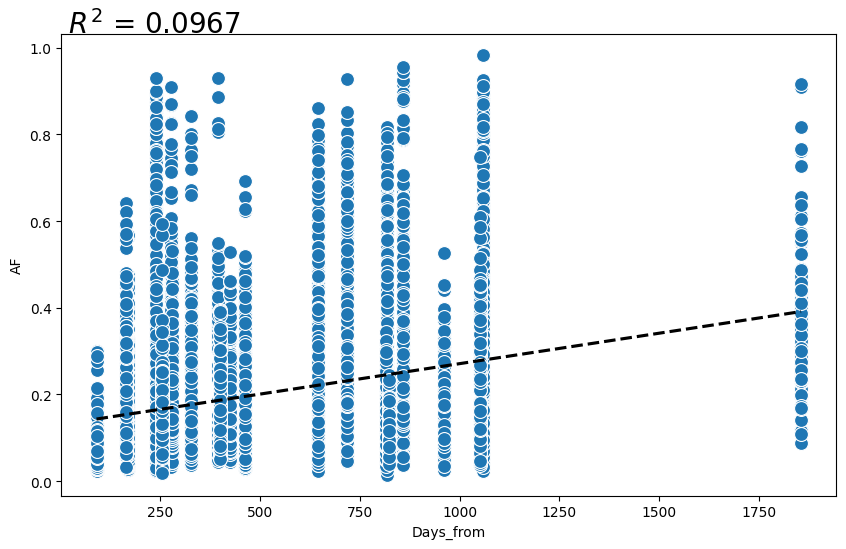

In [237]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=kzm_vaf_probs_plat, x='Days_from', y='AF', s=100, palette='Set2')

sns.regplot(data=kzm_vaf_probs_plat, x='Days_from', y='AF', scatter=False,
            color='black', ci=None, line_kws={'linestyle': '--'})
'''sns.regplot(data=means, x='Days_from', y='AF', scatter=False,
            color='red', ci=None, line_kws={'linestyle': '--'})'''


X = sm.add_constant(kzm_vaf_probs_plat['Days_from'])
model_1 = sm.OLS(kzm_vaf_probs_plat['AF'], X).fit()
model_2 = sm.OLS(kzm_vaf_probs_plat['AF'], X).fit()

# Annotate R²
r_squared_1 = model_1.rsquared
r_squared_2 = model_2.rsquared
x_pos = 0 #medians['Days_from'].median()
y_pos = kzm_vaf_probs_plat['AF'].max() + 0.05
plt.text(0, y_pos, f" $R^2$ = {r_squared_1:.4f}",
            color='black', fontsize=20)

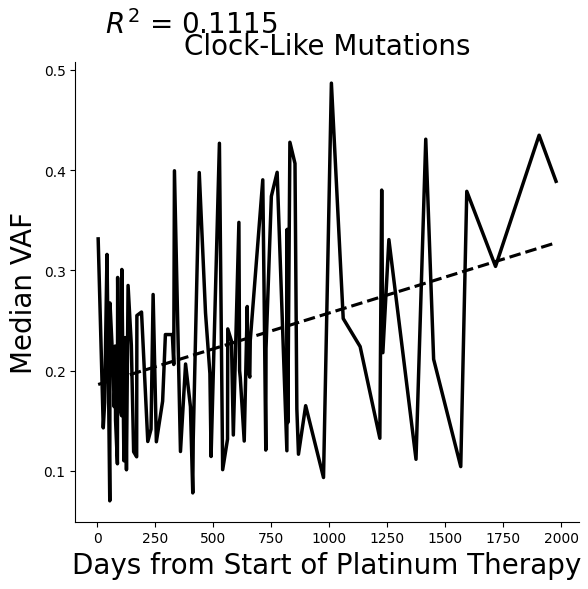

In [250]:
import statsmodels.api as sm

# Scatterplot
plt.figure(figsize=(6, 6))
#sns.scatterplot(data=kzm_vaf_probs_nonp, x='Days_from', y='AF', s=100, palette='Set2')

#df_probs = kzm_vaf_probs_plat#[kzm_vaf_probs_plat.Days_from<2000]
df_probs = kzm_vaf_probs_cloc[kzm_vaf_probs_cloc.Days_from<2000]

medians = df_probs.groupby(['Days_from'])['AF'].median().reset_index()
means = df_probs.groupby(['Days_from'])['AF'].mean().reset_index()

# [medians.Days_from<2000]


sns.lineplot(data=medians, x='Days_from', y='AF', estimator=None,
             legend=False, lw=2.5, markers=True, color='black')
'''sns.lineplot(data=means, x='Days_from', y='AF', estimator=None,
             legend=False, lw=2.5, markers=True, color='red')'''

# Plot regression line
sns.regplot(data=medians, x='Days_from', y='AF', scatter=False,
            color='black', ci=None, line_kws={'linestyle': '--'})
'''sns.regplot(data=means, x='Days_from', y='AF', scatter=False,
            color='red', ci=None, line_kws={'linestyle': '--'})'''


X = sm.add_constant(medians['Days_from'])
model_1 = sm.OLS(medians['AF'], X).fit()
model_2 = sm.OLS(means['AF'], X).fit()

# Annotate R²
r_squared_1 = model_1.rsquared
r_squared_2 = model_2.rsquared
x_pos = 0 #medians['Days_from'].median()
y_pos = medians['AF'].max() + 0.05
plt.text(0, y_pos, f" $R^2$ = {r_squared_1:.4f}",
            color='black', fontsize=20)
'''plt.text(0, y_pos-0.02, f" $R^2$ = {r_squared_2:.4f}",
            color='red', fontsize=20)'''

plt.title('Clock-Like Mutations', fontsize=20)
plt.xlabel('Days from Start of Platinum Therapy', fontsize=20)
plt.ylabel('Median VAF', fontsize=20)
#plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()

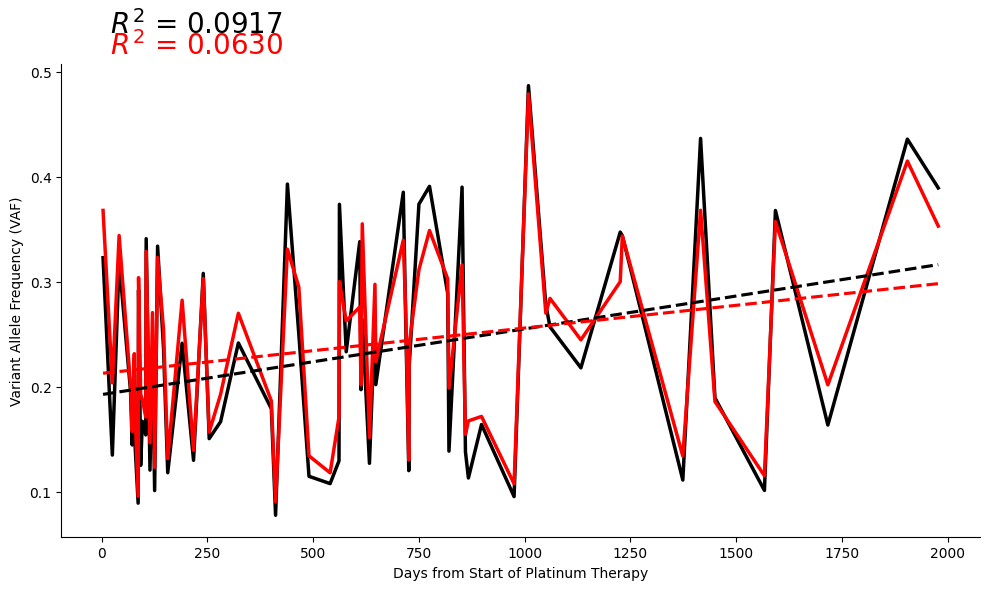

In [231]:

# Scatterplot
plt.figure(figsize=(10, 6))
#sns.scatterplot(data=kzm_vaf_probs_nonp, x='Days_from', y='AF', s=100, palette='Set2')
df_probs = kzm_vaf_probs_cloc[kzm_vaf_probs_cloc.Days_from<2000]

df_probs = kzm_vaf_probs_cloc[kzm_vaf_probs_cloc.Days_from<2000]

medians = df_probs.groupby(['Days_from'])['AF'].median().reset_index()
means = df_probs.groupby(['Days_from'])['AF'].mean().reset_index()

# [medians.Days_from<2000]


sns.lineplot(data=medians, x='Days_from', y='AF', estimator=None,
             legend=False, lw=2.5, markers=True, color='black')
sns.lineplot(data=means, x='Days_from', y='AF', estimator=None,
             legend=False, lw=2.5, markers=True, color='red')

# Plot regression line
sns.regplot(data=medians, x='Days_from', y='AF', scatter=False,
            color='black', ci=None, line_kws={'linestyle': '--'})
sns.regplot(data=means, x='Days_from', y='AF', scatter=False,
            color='red', ci=None, line_kws={'linestyle': '--'})


X = sm.add_constant(medians['Days_from'])
model_1 = sm.OLS(medians['AF'], X).fit()
model_2 = sm.OLS(means['AF'], X).fit()

# Annotate R²
r_squared_1 = model_1.rsquared
r_squared_2 = model_2.rsquared
x_pos = 0 #medians['Days_from'].median()
y_pos = medians['AF'].max() + 0.05
plt.text(0, y_pos, f" $R^2$ = {r_squared_1:.4f}",
            color='black', fontsize=20)
plt.text(0, y_pos-0.02, f" $R^2$ = {r_squared_2:.4f}",
            color='red', fontsize=20)

plt.title('')
plt.xlabel('Days from Start of Platinum Therapy')
plt.ylabel('Variant Allele Frequency (VAF)')
#plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()


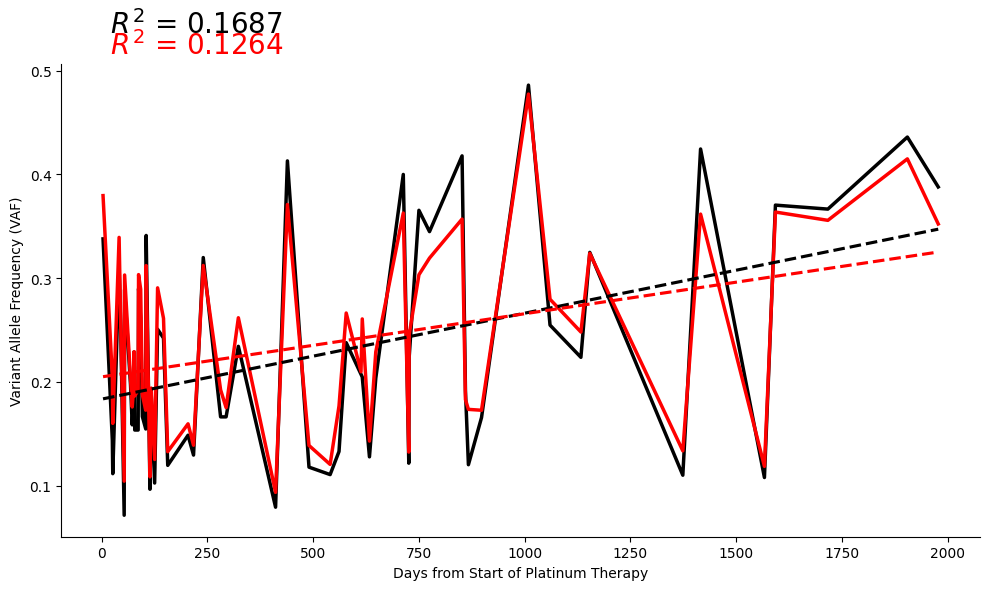

In [232]:

# Scatterplot
plt.figure(figsize=(10, 6))
#sns.scatterplot(data=kzm_vaf_probs_nonp, x='Days_from', y='AF', s=100, palette='Set2')

df_probs = kzm_vaf_probs_nonp[kzm_vaf_probs_nonp.Days_from<2000]

medians = df_probs.groupby(['Days_from'])['AF'].median().reset_index()
means = df_probs.groupby(['Days_from'])['AF'].mean().reset_index()

# [medians.Days_from<2000]


sns.lineplot(data=medians, x='Days_from', y='AF', estimator=None,
             legend=False, lw=2.5, markers=True, color='black')
sns.lineplot(data=means, x='Days_from', y='AF', estimator=None,
             legend=False, lw=2.5, markers=True, color='red')

# Plot regression line
sns.regplot(data=medians, x='Days_from', y='AF', scatter=False,
            color='black', ci=None, line_kws={'linestyle': '--'})
sns.regplot(data=means, x='Days_from', y='AF', scatter=False,
            color='red', ci=None, line_kws={'linestyle': '--'})


X = sm.add_constant(medians['Days_from'])
model_1 = sm.OLS(medians['AF'], X).fit()
model_2 = sm.OLS(means['AF'], X).fit()

# Annotate R²
r_squared_1 = model_1.rsquared
r_squared_2 = model_2.rsquared
x_pos = 0 #medians['Days_from'].median()
y_pos = medians['AF'].max() + 0.05
plt.text(0, y_pos, f" $R^2$ = {r_squared_1:.4f}",
            color='black', fontsize=20)
plt.text(0, y_pos-0.02, f" $R^2$ = {r_squared_2:.4f}",
            color='red', fontsize=20)

plt.title('')
plt.xlabel('Days from Start of Platinum Therapy')
plt.ylabel('Variant Allele Frequency (VAF)')
#plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()


In [127]:
kzm_vaf.head(2)

,#CHROM,POS,REF,ALT,AF,Sample,mid,trinuc,tid
63794,1,1114591,G,A,0.408,KiCS0010_270645,KiCS0010_270645_1_1114591,C[C>T]G,KiCS0010_270645_C[C>T]G
63795,1,1472855,G,T,0.244,KiCS0010_270645,KiCS0010_270645_1_1472855,A[C>A]C,KiCS0010_270645_A[C>A]C


In [109]:
cnv_df = pd.read_csv('/Users/mehdi/Documents/MyRepos/KiCS/data/KZM611_CNV_SPEx.tsv', sep='\t')
cnv_df.head(2)

,sample_id,Chromosome,Start Position,End Position,Normal TCN,Normal BCN,Tumour TCN,Tumour BCN
0,zcc204,1,9436001,10553000,2,1,3,1
1,zcc204,1,11024001,11183000,2,1,3,1


In [110]:
cnv_df = cnv_df[cnv_df.sample_id.isin(kzm_vaf.Sample.unique().tolist())]


In [ ]:
import pandas as pd
import pyranges as pr

# Example SNV dataframe
# Columns: 'chr', 'pos', 'ref', 'alt'
kzm_vaf['Start'] = kzm_vaf['POS']
kzm_vaf['End'] = kzm_vaf['POS'] + 1  # treat SNV as 1bp interval

# Example CNV dataframe
# Columns: 'chr', 'start', 'end', 'CN_minor', 'CN_total'
# Ensure columns are named consistently
kzm_vaf = kzm_vaf.rename(columns={'#CHROM': 'Chromosome', 'REF': 'ref', 'ALT': 'alt'})

In [111]:
cnv_df = cnv_df.rename(columns={'chr': 'Chromosome', 'Start Position': 'Start', 'End Position': 'End', 'Tumour TCN': 'CN_total', 'Tumour BCN': 'CN_minor'})

cnv_df.head(3)

,sample_id,Chromosome,Start,End,Normal TCN,Normal BCN,CN_total,CN_minor
422,KiCS0048_18_753,1,801943,59306065,2,1,1,0
423,KiCS0048_18_753,1,231965989,232258719,2,1,1,0
424,KiCS0048_18_753,2,41587850,72254770,2,1,1,0


In [108]:
cnv_df.head(3)

,sample_id,Chromosome,Start,End,Normal TCN,Normal BCN,CN_total,CN_minor


In [112]:
snv_cnv_df = pd.DataFrame()
for sam in kzm_vaf.Sample.unique():
    snv_sub = kzm_vaf[kzm_vaf.Sample==sam]
    cnv_sub = cnv_df[cnv_df.sample_id==sam]

    snv_gr = pr.PyRanges(snv_sub)
    cnv_gr = pr.PyRanges(cnv_sub)

    joined = snv_gr.join(cnv_gr)

    # Convert back to pandas DataFrame
    annotated_df = joined.df

    if len(annotated_df) == 0:
        continue

    # (Optional) keep only relevant columns
    annotated_df = annotated_df[['Chromosome', 'Start', 'ref', 'alt', 'CN_minor', 'CN_total']]
    annotated_df['sample_id'] = sam

    snv_cnv_df = pd.concat([snv_cnv_df, annotated_df], axis=0, ignore_index=True)

join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


In [115]:
snv_cnv_df.tail()

,Chromosome,Start,ref,alt,CN_minor,CN_total,sample_id
673716,X,70614428,G,A,1,4,zcc225
673717,X,70824020,G,A,1,5,zcc225
673718,X,154171114,C,T,1,3,zcc225
673719,X,154464427,G,A,1,3,zcc225
673720,X,154821682,A,T,1,3,zcc225


In [97]:
snv_df = kzm_vaf[kzm_vaf.Sample==sam]
cnv_df = cnv_df[cnv_df.sample_id==sam]

snv_gr = pr.PyRanges(snv_df)
cnv_gr = pr.PyRanges(cnv_df)

joined = snv_gr.join(cnv_gr)

# Convert back to pandas DataFrame
annotated_df = joined.df

join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


In [100]:
cnv_df

,sample_id,Chromosome,Start,End,Normal TCN,Normal BCN,CN_total,CN_minor


In [69]:
# Convert back to pandas DataFrame
annotated_df = joined.df

# (Optional) keep only relevant columns
annotated_df = annotated_df[['Chromosome', 'Start', 'ref', 'alt', 'CN_minor', 'CN_total']]


In [81]:
annotated_df.head(10)

,Chromosome,Start,ref,alt,CN_minor,CN_total
0,1,811640,G,C,1,3
1,1,977140,C,T,1,3
2,1,977187,C,T,1,3
3,1,1745223,C,A,1,3
4,1,1745224,C,A,1,3
5,1,1885094,T,C,1,3
6,1,1917182,C,T,1,3
7,1,1962245,C,T,1,3
8,1,2102014,G,C,1,3
9,1,2208285,G,A,1,3


In [83]:
zcc225_cnv.head()

,sample_id,Chromosome,Start,End,Normal TCN,Normal BCN,CN_total,CN_minor
71215,zcc225,1,1,4363314,2,1,3,1
71216,zcc225,1,4363315,5285377,2,1,3,1
71217,zcc225,1,5285378,6501067,2,1,3,1
71218,zcc225,1,6501068,6616340,2,1,4,1
71219,zcc225,1,6616341,16151564,2,1,3,1


-----------
## Panel a

(141, 22)



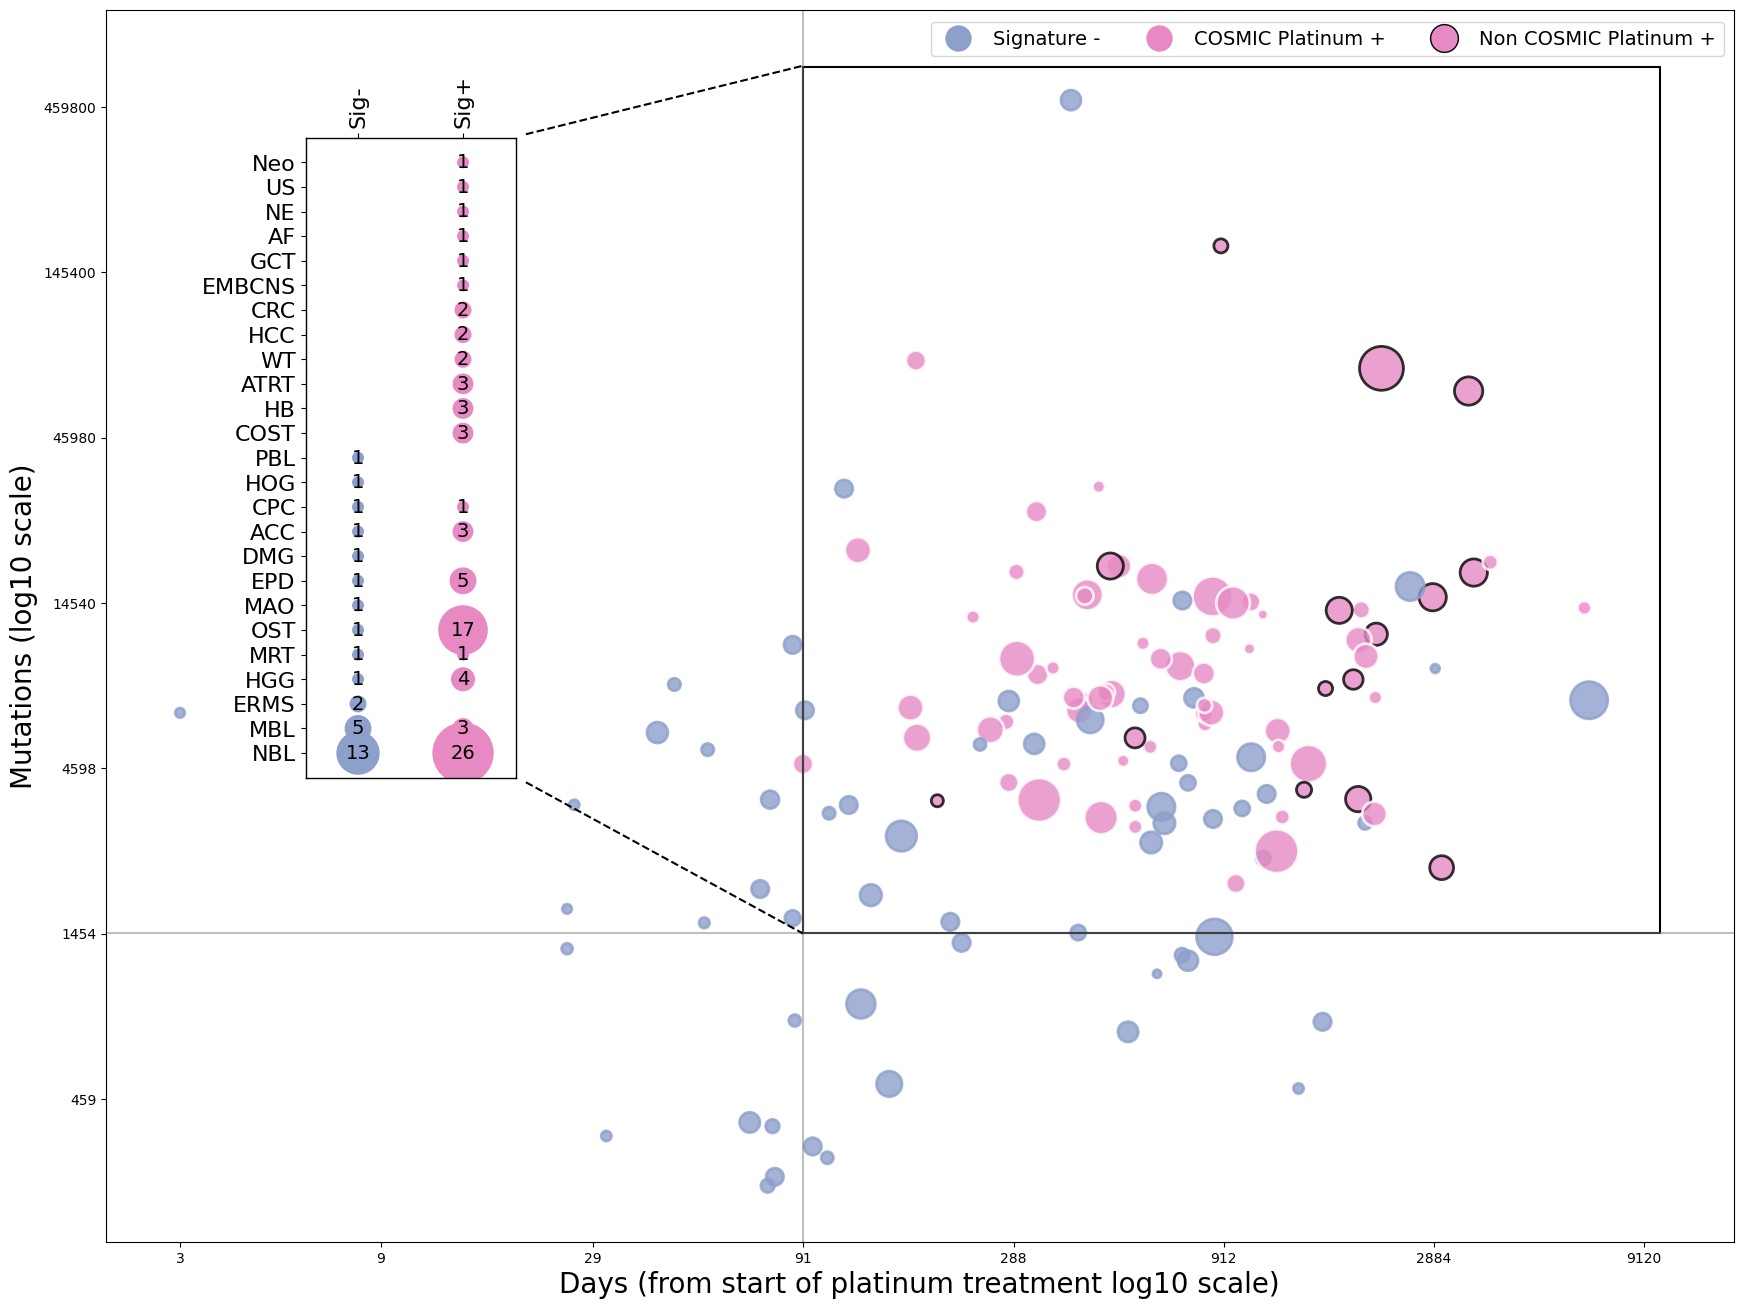

In [96]:
pcols = []

plat_df2plot = all_plat_sigs_df[all_plat_sigs_df.Total_drugs != 'NNN'].copy()
plat_df2plot['color'] = [set2_cols[2] if x=='N' else set2_cols[3] for x in plat_df2plot.Platin_sig]

for r in range(plat_df2plot.shape[0]):
    if plat_df2plot.cos_total.iloc[r] > 0:
        pcols.append('white')
    elif plat_df2plot.nonCos_total.iloc[r] > 0:
        pcols.append('black')
    else:
        pcols.append(set2_cols[2])


f, ax = plt.subplots(figsize=(21,16))

ax.scatter(plat_df2plot.Days_log, plat_df2plot.SBS_log,
                     c=plat_df2plot.color,
                     linewidth=2,
                     s=plat_df2plot.Size,
                     edgecolor=pcols,
                     alpha=0.8)


custom_lines = [Line2D([0], [0], color='white', marker='o', mfc=set2_cols[2], ms=20),
                Line2D([0], [0], color='white', marker='o', mfc=set2_cols[3], ms=20),
                Line2D([0], [0], color='white', marker='o', mfc=set2_cols[3], mec='black', ms=20)]
leg_labels = ['Signature -', 'COSMIC Platinum +', 'Non COSMIC Platinum +']
plt.legend(custom_lines, leg_labels, loc='upper right',
          bbox_to_anchor=(1,.998), ncol = 3, fontsize=14)

ax.set_xticks([0.477, 0.9542, 1.46, 1.96, 2.46, 2.96, 3.46, 3.96])
ax.set_xticklabels([3, 9, 29, 91, 288, 912, 2884, 9120])

ax.set_yticks([2.1625, 2.6625, 3.1625, 3.6625, 4.1625, 4.6625, 5.1625, 5.6625])
ax.set_yticklabels([145, 459, 1454, 4598, 14540, 45980, 145400, 459800])
#ax.set_facecolor('#f4f0eb')

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
min_day = plat_df2plot[plat_df2plot.Platin_sig=='Y'].Days_log.min()
min_sbs = plat_df2plot[plat_df2plot.Platin_sig=='Y'].SBS_log.min()
max_sbs = plat_df2plot[plat_df2plot.Platin_sig=='Y'].SBS_log.max()

plt.axvline(min_day, color="gray", alpha=0.5)
plt.axhline(min_sbs, color="gray", alpha=0.5)

rect = patches.Rectangle((min_day, min_sbs), x_max-min_day, max_sbs/2, linewidth=1.5, edgecolor='black', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

def label_point(plot_df, ax):
    a = pd.concat({'x': plot_df.Days_log, 'y': plot_df.SBS_log, 'val': plot_df.Tumor, 'sig': plot_df.Platin_sig}, axis=1)
    p_count = 0
    for i, point in a.iterrows():
        if str(point['sig']) in ['N']:
            ax.text(point['x']+.02, point['y'], str(point['val']))
        p_count += 1

plt.ylabel('Mutations (log10 scale)', fontsize=20)
plt.xlabel('Days (from start of platinum treatment log10 scale)', fontsize=20)

type_sig_mlt = ut.get_type_numbers(plat_df2plot[(plat_df2plot.SBS_log>=min_sbs) & (plat_df2plot.Days_log>=min_day)].copy())

x1, y1 = [1.3, min_day], [3.62, min_sbs]
x2, y2 = [1.3, min_day], [5.58, y_max-0.06]
plt.plot(x1, y1, x2, y2, color='black', linestyle='--')

ax2 = f.add_axes([0.22,0.4, .1,.4])
plt.scatter(type_sig_mlt.Sig, type_sig_mlt.Tumor, edgecolors='k',
            s=type_sig_mlt.Count*75, c=type_sig_mlt.Color,
            zorder=2,
            linewidths=0)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(1)
ax2.xaxis.tick_top()
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.xlim([-0.5, 1.5])
plt.ylim([-1, type_sig_mlt.shape[0]/2])
#ax2.set_facecolor('#f4f0eb')

for i, txt in enumerate(type_sig_mlt.Count):
    if txt != txt or txt==0:
        continue
    else:
        ax2.annotate(int(np.round(txt)), (type_sig_mlt.Sig[i], type_sig_mlt.Tumor[i]),
                    fontsize=14, ha='center', va='center')

print(plat_df2plot.shape)

print()
#plt.savefig(os.path.join(fig_out, 'Fig_4a.pdf'), bbox_inches="tight")

-----------
## Panel b

In [251]:
KZM_dates = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_dates.tsv'), sep='\t', index_col=0)

In [252]:
gen_thr_sigs = ['SBS35', 'DBS78H2', 'SBS31', 'SBS288L5', 'DBS5', 'DBS2', 'DBS6', 'DBS4', 'ID8', 'SBS288L3', 'DBS9', 'ID3', 'SBS288L4', 'SBS288L2']
plat_enr_sigs = ['SBS35', 'DBS78H2', 'SBS31', 'SBS288L5', 'DBS5', 'DBS2', 'DBS6', 'ID3']

In [253]:
kzm611_gen_thr_sigs = kzm611_sigs[gen_thr_sigs].copy()
kzm611_gen_thr_sigs.head(3)

,SBS35,DBS78H2,SBS31,SBS288L5,DBS5,DBS2,DBS6,DBS4,ID8,SBS288L3,DBS9,ID3,SBS288L4,SBS288L2
I-H-108298-T1-1-D1-1,1868,0.0,0,0,60.0,80.0,0.0,0.0,0,0,0.0,0,0,0
I-H-108317-T1-1-D1-1,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0
I-H-108319-T1-1-D1-1,2833,57.0,0,0,0.0,25.0,0.0,0.0,0,0,0.0,0,0,0


In [254]:
## Subset post-therapy samples
kzm611_gen_thr_sigs_v2 = kzm611_gen_thr_sigs.loc[[x for x in kzm611_gen_thr_sigs.index if x  in kzm611_md[kzm611_md.Therapy=='Post-Therapy'].index.tolist()]].copy()
kzm611_gen_thr_sigs_v2.shape

(349, 14)

In [255]:
KZM_dates_gen_thr = KZM_dates[KZM_dates.Days_from > 0].copy()
KZM_dates_gen_thr['Months'] = [np.ceil(x/30) for x in KZM_dates_gen_thr.Days_from]
KZM_dates_gen_thr['sigsYN'] = ['Y' if x in kzm611_gen_thr_sigs_v2.loc[(kzm611_gen_thr_sigs_v2 > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in KZM_dates_gen_thr.index]
KZM_dates_gen_thr.head()

,Sample_date,Days_from,Months,sigsYN
KiCS0002_321321,2015-05-15,858.0,29.0,Y
KiCS0006_274243,2015-05-24,1198.0,40.0,N
KiCS0007_302948,2015-02-20,15.0,1.0,N
KiCS0008_289185,2016-07-06,762.0,26.0,Y
KiCS0010_270645,2014-04-01,3.0,1.0,N


In [256]:
gen_months_dict = {}
for mo in KZM_dates_gen_thr.Months.unique():
    subd = KZM_dates_gen_thr[KZM_dates_gen_thr.Months<=mo]
    
    if 'Y' in subd.sigsYN.tolist():
        gen_months_dict[mo] = subd.sigsYN.value_counts()['Y']/subd.shape[0]
    else:
        gen_months_dict[mo] = 0
months_gen_sigs_df = pd.DataFrame.from_dict(gen_months_dict, orient='index')
months_gen_sigs_df.columns = ['Patients_Percent']
months_gen_sigs_df['Months'] = months_gen_sigs_df.index.tolist()
months_gen_sigs_df.head(2)

,Patients_Percent,Months
29.0,0.235294,29.0
40.0,0.265060,40.0


In [257]:
all_plat_sigs_df_v2 = all_plat_sigs_df.copy()
all_plat_sigs_df_v2['Months'] = [np.ceil(x/30) for x in all_plat_sigs_df_v2.Days_from]
plat_months_dict = {}
for mo in all_plat_sigs_df_v2.Months.unique():
    subd = all_plat_sigs_df_v2[all_plat_sigs_df_v2.Months<=mo]
    if 'Y' in subd.Platin_sig.tolist():
        plat_months_dict[mo] = subd.Platin_sig.value_counts()['Y']/subd.shape[0]
    else:
        plat_months_dict[mo] = 0
months_plat_sigs_df = pd.DataFrame.from_dict(plat_months_dict, orient='index')
months_plat_sigs_df.columns = ['Patients_Percent']
months_plat_sigs_df['Months'] = months_plat_sigs_df.index.tolist()
months_plat_sigs_df.head(2)

,Patients_Percent,Months
29.0,0.504950,29.0
39.0,0.513514,39.0


In [269]:
all_plat_sigs_df_v2['Thr_State'] = [kzm611_md.loc[x, 'Thr_State'] for x in all_plat_sigs_df_v2.Sample_id]
all_plat_sigs_df_v2.head(2)

,Sample_id,Patient_id,Tumor,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,Oxaliplatin,...,SBS_log,Platin_sig,Platin_sbs,Platin_dbs,Platin_id,Total_drugs,cos_total,nonCos_total,Months,Thr_State
0,KiCS0002_321321,KiCS0002,GCT,858,0.198413,0.636364,0.0,Y,Y,N,...,4.182044,Y,Y,Y,Y,YYN,15254.0,588.0,29.0,Advanced-Treated
1,KiCS0006_274243,KiCS0006,NBL,1154,0.158730,0.000000,0.0,Y,N,N,...,3.584557,N,N,N,N,YNN,0.0,0.0,39.0,Advanced-Treated


In [270]:
all_plat_sigs_df_v2.Thr_State.value_counts()

Thr_State
Advanced-Treated    103
Primary-Treated      38
Name: count, dtype: int64

In [271]:
all_plat_sigs_PT = all_plat_sigs_df_v2[all_plat_sigs_df_v2.Thr_State=='Primary-Treated'].copy()
pt_months_dict = {}
for mo in all_plat_sigs_PT.Months.unique():
    subd = all_plat_sigs_PT[all_plat_sigs_PT.Months<=mo]
    if 'Y' in subd.Platin_sig.tolist():
        pt_months_dict[mo] = subd.Platin_sig.value_counts()['Y']/subd.shape[0]
    else:
        pt_months_dict[mo] = 0
months_pt_sigs_df = pd.DataFrame.from_dict(pt_months_dict, orient='index')
months_pt_sigs_df.columns = ['Patients_Percent']
months_pt_sigs_df['Months'] = months_pt_sigs_df.index.tolist()
months_pt_sigs_df.head(2)

,Patients_Percent,Months
3.0,0.000000,3.0
4.0,0.052632,4.0


In [272]:
all_plat_sigs_AT = all_plat_sigs_df_v2[all_plat_sigs_df_v2.Thr_State=='Advanced-Treated'].copy()
at_months_dict = {}
for mo in all_plat_sigs_AT.Months.unique():
    subd = all_plat_sigs_AT[all_plat_sigs_AT.Months<=mo]
    if 'Y' in subd.Platin_sig.tolist():
        at_months_dict[mo] = subd.Platin_sig.value_counts()['Y']/subd.shape[0]
    else:
        at_months_dict[mo] = 0
months_at_sigs_df = pd.DataFrame.from_dict(at_months_dict, orient='index')
months_at_sigs_df.columns = ['Patients_Percent']
months_at_sigs_df['Months'] = months_at_sigs_df.index.tolist()
months_at_sigs_df.head(2)

,Patients_Percent,Months
29.0,0.621212,29.0
39.0,0.618421,39.0


In [258]:
antimets_dates = pd.read_csv(os.path.join(root_dir, 'source_data/KiCS_antimetabolites.tsv'), sep='\t', index_col=0)
anthra_dates = pd.read_csv(os.path.join(root_dir, 'source_data/KiCS_anthracyclines.tsv'), sep='\t', index_col=0)

anthra_dates = anthra_dates[anthra_dates.Days_from > 0].copy()
anthra_dates['Months'] = [np.ceil(x/30) for x in anthra_dates.Days_from]

antimets_dates = antimets_dates[antimets_dates.Days_from > 0].copy()
antimets_dates['Months'] = [np.ceil(x/30) for x in antimets_dates.Days_from]
anthra_dates.shape, antimets_dates.shape

((82, 7), (31, 7))

In [259]:
anthra_dates['sigsYN'] = ['Y' if x in kzm611_gen_thr_sigs_v2.loc[(kzm611_gen_thr_sigs_v2 > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in anthra_dates.index]
antimets_dates['sigsYN'] = ['Y' if x in kzm611_gen_thr_sigs_v2.loc[(kzm611_gen_thr_sigs_v2 > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in antimets_dates.index]

In [260]:
anthra_months_dict = {}
for mo in anthra_dates.Months.unique():
    subd = anthra_dates[anthra_dates.Months<=mo]
    if 'Y' in subd.sigsYN.tolist():
        anthra_months_dict[mo] = subd.sigsYN.value_counts()['Y']/subd.shape[0]
    else:
        anthra_months_dict[mo] = 0
anthra_months_sigs = pd.DataFrame.from_dict(anthra_months_dict, orient='index')
anthra_months_sigs.columns = ['Patients_Percent']
anthra_months_sigs['Months'] = anthra_months_sigs.index.tolist()
anthra_months_sigs.head(2)

,Patients_Percent,Months
38.0,0.4375,38.0
1.0,0.0000,1.0


In [261]:
antimets_months_dict = {}
for mo in antimets_dates.Months.unique():
    subd = antimets_dates[antimets_dates.Months<=mo]
    if 'Y' in subd.sigsYN.tolist():
        antimets_months_dict[mo] = subd.sigsYN.value_counts()['Y']/subd.shape[0]
    else:
        antimets_months_dict[mo] = 0
antimets_months_sigs = pd.DataFrame.from_dict(antimets_months_dict, orient='index')
antimets_months_sigs.columns = ['Patients_Percent']
antimets_months_sigs['Months'] = antimets_months_sigs.index.tolist()
antimets_months_sigs.head(2)

,Patients_Percent,Months
2.0,0.000000,2.0
10.0,0.214286,10.0


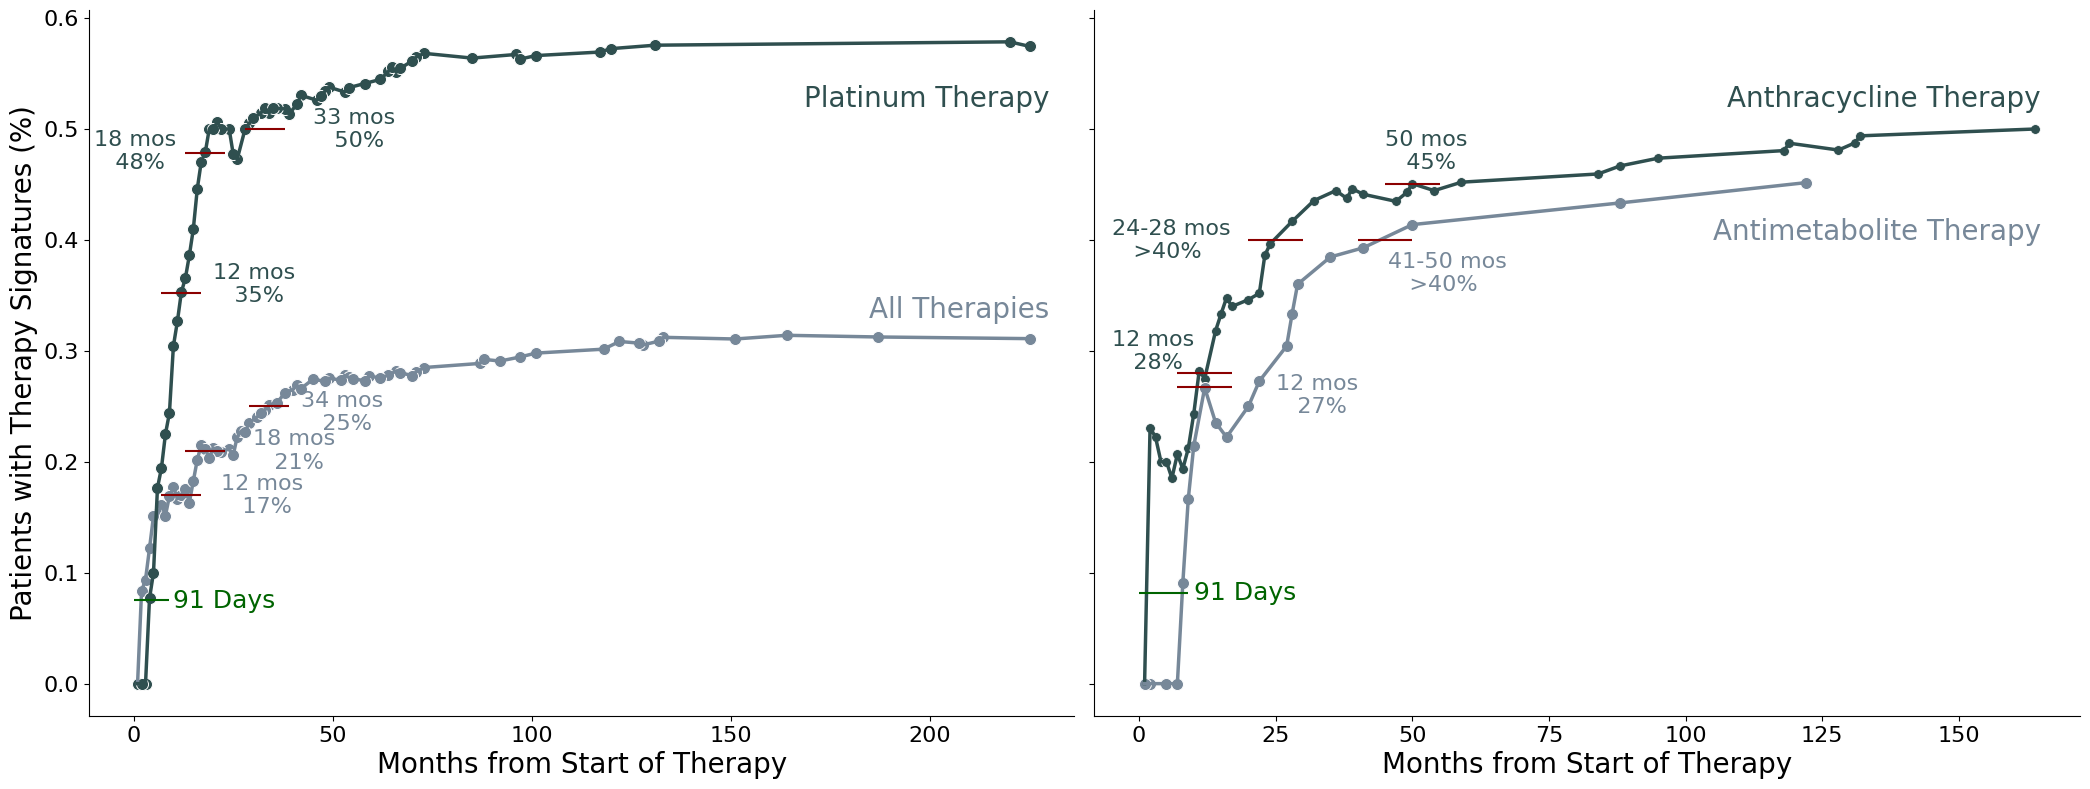

In [ ]:
#fig, ax = plt.subplots(figsize=(12, 8))
fig, axes = plt.subplots(1,2, figsize=(21, 8), sharey=True, gridspec_kw={'width_ratios': [1, 1]})

ax1 = sns.lineplot(data=months_gen_sigs_df, x="Months", y="Patients_Percent", ax=axes[0], color='lightslategrey', linewidth=2.5)
ax1 = sns.scatterplot(data=months_gen_sigs_df, x="Months", y="Patients_Percent", ax=axes[0], color='lightslategrey', s=75)



ax2 = sns.lineplot(data=months_plat_sigs_df, x="Months", y="Patients_Percent", ax=axes[0], color='darkslategrey', linewidth=2.5)
ax2 = sns.scatterplot(data=months_plat_sigs_df, x="Months", y="Patients_Percent", ax=axes[0], color='darkslategrey', s=75)

#col = np.where(anthra_months_sigs.Months.isin([12,14, 15, 16]),'red','blue')

axes[0].set_xlabel('Months from Start of Therapy', fontsize=20)
axes[0].set_ylabel('Patients with Therapy Signatures (%)', fontsize=20)
plt.title('', fontsize=18)
axes[0].spines[['right', 'top']].set_visible(False)

axes[0].hlines(0.17, color='darkred', xmin=7, xmax=17)
axes[0].hlines(0.21, color='darkred', xmin=13, xmax=23)
axes[0].hlines(0.25, color='darkred', xmin=29, xmax=39)
#axes[0].hlines(0.27, color='darkred', xmin=40, xmax=50)
ax1.text(22, 0.17, '12 mos\n   17%', va='center', color='lightslategrey', fontsize=16)
ax1.text(30, 0.21, '18 mos\n   21%', va='center', color='lightslategrey', fontsize=16)
ax1.text(42, 0.245, '34 mos\n   25%', va='center', color='lightslategrey', fontsize=16)
#ax1.text(35, 0.29, '45 mos\n   27%', va='center', color='lightslategrey', fontsize=16)

axes[0].hlines(0.352, color='darkred', xmin=7, xmax=17)
axes[0].hlines(0.478, color='darkred', xmin=13, xmax=23)
axes[0].hlines(0.5, color='darkred', xmin=28, xmax=38)
axes[0].text(20, 0.36, '12 mos\n   35%', va='center', color='darkslategrey', fontsize=16)
axes[0].text(-10, 0.48, '18 mos\n   48%', va='center', color='darkslategrey', fontsize=16)
axes[0].text(45, 0.5, '33 mos\n   50%', va='center', color='darkslategrey', fontsize=16)



axes[0].text(230, 0.52, 'Platinum Therapy', ha='right', color='darkslategrey', fontsize=20)
axes[0].text(230, 0.33, 'All Therapies', ha='right', color='lightslategrey', fontsize=20)


ax3 = sns.lineplot(data=anthra_months_sigs, x="Months", y="Patients_Percent", ax=axes[1], color='darkslategrey', linewidth=2.5)
ax3 = sns.scatterplot(data=anthra_months_sigs, x="Months", y="Patients_Percent", ax=axes[1], color='darkslategrey', s=50)

ax4 = sns.lineplot(data=antimets_months_sigs, x="Months", y="Patients_Percent", ax=axes[1], color='lightslategrey', linewidth=2.5)
ax4 = sns.scatterplot(data=antimets_months_sigs, x="Months", y="Patients_Percent", ax=axes[1], color='lightslategrey', s=75)

axes[1].set_xlabel('Months from Start of Therapy', fontsize=20)
axes[1].set_ylabel('Patients with Therapy Signatures (%)', fontsize=20)
axes[1].set_title('', fontsize=18)

axes[1].hlines(0.28, color='darkred', xmin=7, xmax=17)
axes[1].hlines(0.40, color='darkred', xmin=20, xmax=30)
axes[1].hlines(0.45, color='darkred', xmin=45, xmax=55)
axes[1].text(-5, 0.3, '12 mos\n   28%', va='center', color='darkslategrey', fontsize=16)
axes[1].text(-5, 0.4, '24-28 mos\n   >40%', va='center', color='darkslategrey', fontsize=16)
axes[1].text(45, 0.48, '50 mos\n   45%', va='center', color='darkslategrey', fontsize=16)

axes[1].hlines(0.267, color='darkred', xmin=7, xmax=17)
axes[1].hlines(0.40, color='darkred', xmin=40, xmax=50)
axes[1].text(25, 0.26, '12 mos\n   27%', va='center', color='lightslategrey', fontsize=16)
axes[1].text(45.5, 0.37, '41-50 mos\n   >40%', va='center', color='lightslategrey', fontsize=16)

axes[1].text(165, 0.52, 'Anthracycline Therapy', ha='right', color='darkslategrey', fontsize=20)
axes[1].text(165, 0.4, 'Antimetabolite Therapy', ha='right', color='lightslategrey', fontsize=20)

axes[1].spines[['right', 'top']].set_visible(False)

axes[0].hlines(0.075, color='darkgreen', xmin=0, xmax=9)
axes[0].text(10, 0.075, '91 Days', va='center', color='darkgreen', fontsize=18)
axes[1].hlines(0.082, color='darkgreen', xmin=0, xmax=9)
axes[1].text(10, 0.082, '91 Days', va='center', color='darkgreen', fontsize=18)

axes[0].tick_params(axis='both', which='major', labelsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
#plt.savefig(os.path.join(fig_out, 'Fig_4bc.pdf'), bbox_inches="tight")

In [264]:
months_gen_sigs_df.head()

,Patients_Percent,Months
29.0,0.235294,29.0
40.0,0.265060,40.0
1.0,0.000000,1.0
26.0,0.222222,26.0
3.0,0.093750,3.0


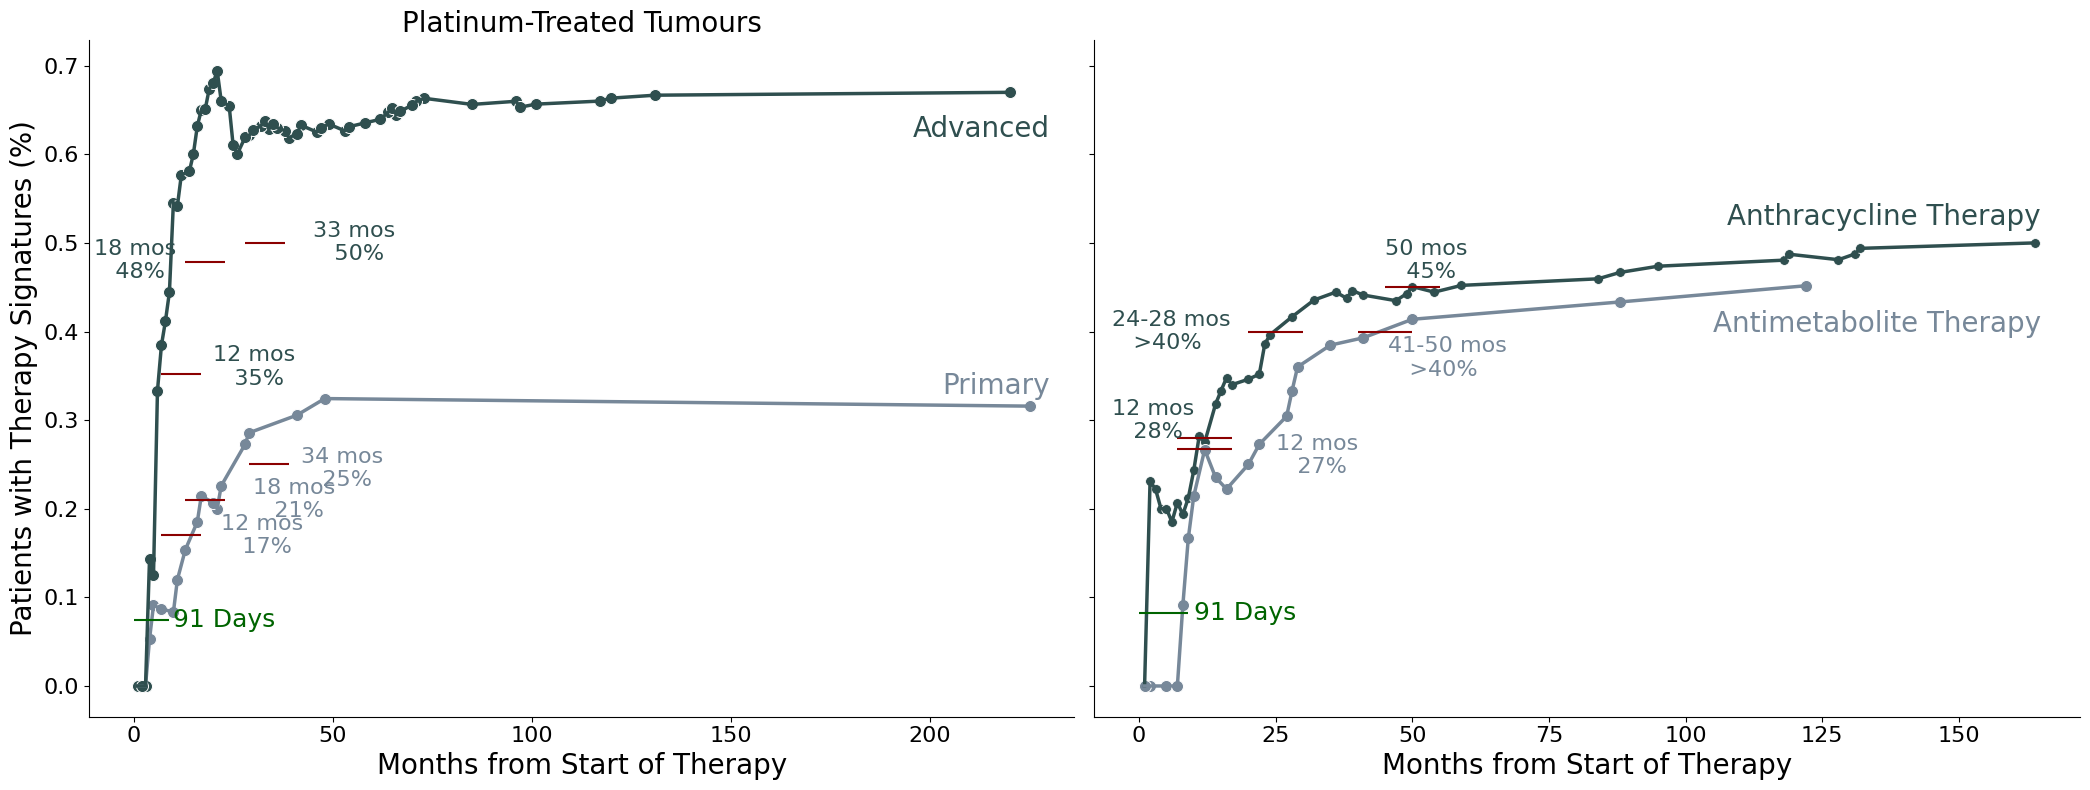

In [ ]:
#fig, ax = plt.subplots(figsize=(12, 8))
fig, axes = plt.subplots(1,2, figsize=(21, 8), sharey=True, gridspec_kw={'width_ratios': [1, 1]})

ax1 = sns.lineplot(data=months_pt_sigs_df, x="Months", y="Patients_Percent", ax=axes[0], color='lightslategrey', linewidth=2.5)
ax1 = sns.scatterplot(data=months_pt_sigs_df, x="Months", y="Patients_Percent", ax=axes[0], color='lightslategrey', s=75)

ax2 = sns.lineplot(data=months_at_sigs_df, x="Months", y="Patients_Percent", ax=axes[0], color='darkslategrey', linewidth=2.5)
ax2 = sns.scatterplot(data=months_at_sigs_df, x="Months", y="Patients_Percent", ax=axes[0], color='darkslategrey', s=75)

#col = np.where(anthra_months_sigs.Months.isin([12,14, 15, 16]),'red','blue')

axes[0].set_xlabel('Months from Start of Therapy', fontsize=20)
axes[0].set_ylabel('Patients with Therapy Signatures (%)', fontsize=20)
plt.title('', fontsize=18)
axes[0].spines[['right', 'top']].set_visible(False)

axes[0].hlines(0.17, color='darkred', xmin=7, xmax=17)
axes[0].hlines(0.21, color='darkred', xmin=13, xmax=23)
axes[0].hlines(0.25, color='darkred', xmin=29, xmax=39)
#axes[0].hlines(0.27, color='darkred', xmin=40, xmax=50)
ax1.text(22, 0.17, '12 mos\n   17%', va='center', color='lightslategrey', fontsize=16)
ax1.text(30, 0.21, '18 mos\n   21%', va='center', color='lightslategrey', fontsize=16)
ax1.text(42, 0.245, '34 mos\n   25%', va='center', color='lightslategrey', fontsize=16)
#ax1.text(35, 0.29, '45 mos\n   27%', va='center', color='lightslategrey', fontsize=16)

axes[0].hlines(0.352, color='darkred', xmin=7, xmax=17)
axes[0].hlines(0.478, color='darkred', xmin=13, xmax=23)
axes[0].hlines(0.5, color='darkred', xmin=28, xmax=38)
axes[0].text(20, 0.36, '12 mos\n   35%', va='center', color='darkslategrey', fontsize=16)
axes[0].text(-10, 0.48, '18 mos\n   48%', va='center', color='darkslategrey', fontsize=16)
axes[0].text(45, 0.5, '33 mos\n   50%', va='center', color='darkslategrey', fontsize=16)

axes[0].text(230, 0.62, 'Advanced', ha='right', color='darkslategrey', fontsize=20)
axes[0].text(230, 0.33, 'Primary', ha='right', color='lightslategrey', fontsize=20)

axes[0].set_title('Platinum-Treated Tumours', fontsize=20)


ax3 = sns.lineplot(data=anthra_months_sigs, x="Months", y="Patients_Percent", ax=axes[1], color='darkslategrey', linewidth=2.5)
ax3 = sns.scatterplot(data=anthra_months_sigs, x="Months", y="Patients_Percent", ax=axes[1], color='darkslategrey', s=50)

ax4 = sns.lineplot(data=antimets_months_sigs, x="Months", y="Patients_Percent", ax=axes[1], color='lightslategrey', linewidth=2.5)
ax4 = sns.scatterplot(data=antimets_months_sigs, x="Months", y="Patients_Percent", ax=axes[1], color='lightslategrey', s=75)

axes[1].set_xlabel('Months from Start of Therapy', fontsize=20)
axes[1].set_ylabel('Patients with Therapy Signatures (%)', fontsize=20)
axes[1].set_title('', fontsize=18)

axes[1].hlines(0.28, color='darkred', xmin=7, xmax=17)
axes[1].hlines(0.40, color='darkred', xmin=20, xmax=30)
axes[1].hlines(0.45, color='darkred', xmin=45, xmax=55)
axes[1].text(-5, 0.3, '12 mos\n   28%', va='center', color='darkslategrey', fontsize=16)
axes[1].text(-5, 0.4, '24-28 mos\n   >40%', va='center', color='darkslategrey', fontsize=16)
axes[1].text(45, 0.48, '50 mos\n   45%', va='center', color='darkslategrey', fontsize=16)

axes[1].hlines(0.267, color='darkred', xmin=7, xmax=17)
axes[1].hlines(0.40, color='darkred', xmin=40, xmax=50)
axes[1].text(25, 0.26, '12 mos\n   27%', va='center', color='lightslategrey', fontsize=16)
axes[1].text(45.5, 0.37, '41-50 mos\n   >40%', va='center', color='lightslategrey', fontsize=16)

axes[1].text(165, 0.52, 'Anthracycline Therapy', ha='right', color='darkslategrey', fontsize=20)
axes[1].text(165, 0.4, 'Antimetabolite Therapy', ha='right', color='lightslategrey', fontsize=20)

axes[1].spines[['right', 'top']].set_visible(False)

axes[0].hlines(0.075, color='darkgreen', xmin=0, xmax=9)
axes[0].text(10, 0.075, '91 Days', va='center', color='darkgreen', fontsize=18)
axes[1].hlines(0.082, color='darkgreen', xmin=0, xmax=9)
axes[1].text(10, 0.082, '91 Days', va='center', color='darkgreen', fontsize=18)

axes[0].tick_params(axis='both', which='major', labelsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
#plt.savefig(os.path.join(fig_out, 'Fig_4bc.pdf'), bbox_inches="tight")

In [288]:
months_pt_sigs_df.sort_values('Months')

,Patients_Percent,Months
1.0,0.000000,1.0
2.0,0.000000,2.0
3.0,0.000000,3.0
4.0,0.052632,4.0
5.0,0.090909,5.0
7.0,0.086957,7.0
10.0,0.083333,10.0
11.0,0.120000,11.0
13.0,0.153846,13.0
16.0,0.185185,16.0


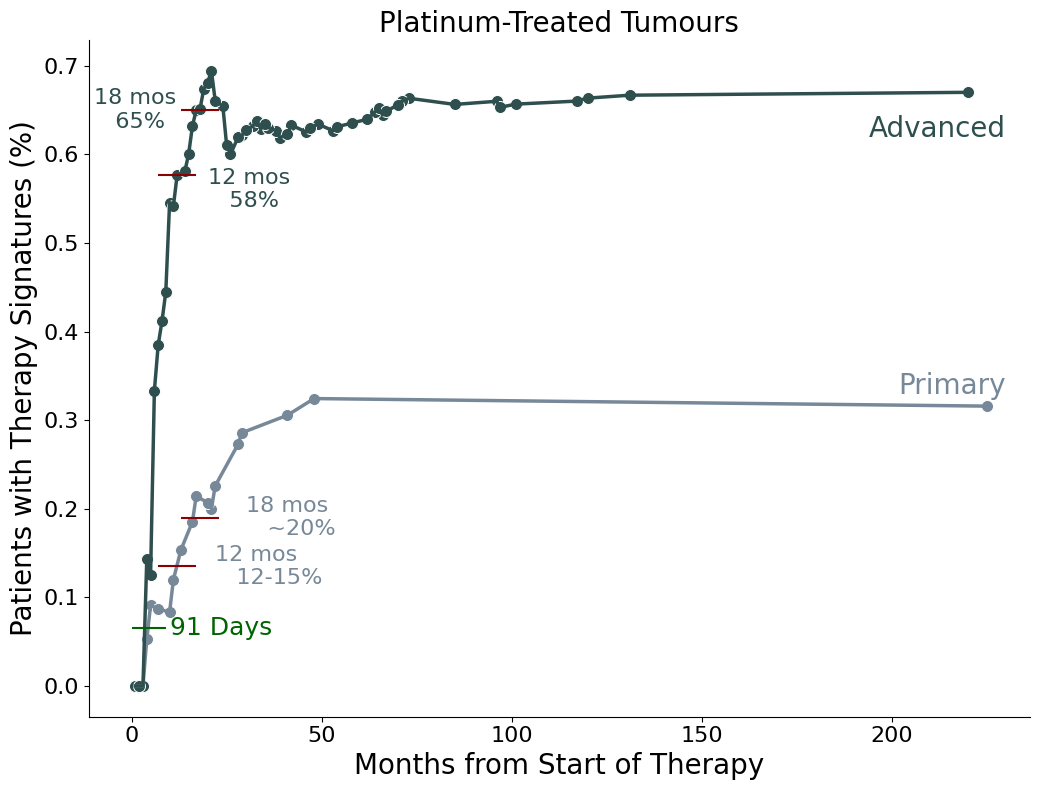

In [292]:
#fig, ax = plt.subplots(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(10.5, 8))

ax1 = sns.lineplot(data=months_pt_sigs_df, x="Months", y="Patients_Percent", color='lightslategrey', linewidth=2.5)
ax1 = sns.scatterplot(data=months_pt_sigs_df, x="Months", y="Patients_Percent", color='lightslategrey', s=75)

ax2 = sns.lineplot(data=months_at_sigs_df, x="Months", y="Patients_Percent", color='darkslategrey', linewidth=2.5)
ax2 = sns.scatterplot(data=months_at_sigs_df, x="Months", y="Patients_Percent", color='darkslategrey', s=75)

#col = np.where(anthra_months_sigs.Months.isin([12,14, 15, 16]),'red','blue')

ax.set_xlabel('Months from Start of Therapy', fontsize=20)
ax.set_ylabel('Patients with Therapy Signatures (%)', fontsize=20)
plt.title('', fontsize=18)
ax.spines[['right', 'top']].set_visible(False)

ax.hlines(0.135, color='darkred', xmin=7, xmax=17)
ax.hlines(0.19, color='darkred', xmin=13, xmax=23)
ax1.text(22, 0.135, '12 mos\n   12-15%', va='center', color='lightslategrey', fontsize=16)
ax1.text(30, 0.19, '18 mos\n   ~20%', va='center', color='lightslategrey', fontsize=16)

ax.hlines(0.576923, color='darkred', xmin=7, xmax=17)
ax.hlines(0.65, color='darkred', xmin=13, xmax=23)
ax.text(20, 0.56, '12 mos\n   58%', va='center', color='darkslategrey', fontsize=16)
ax.text(-10, 0.65, '18 mos\n   65%', va='center', color='darkslategrey', fontsize=16)

ax.text(230, 0.62, 'Advanced', ha='right', color='darkslategrey', fontsize=20)
ax.text(230, 0.33, 'Primary', ha='right', color='lightslategrey', fontsize=20)

ax.set_title('Platinum-Treated Tumours', fontsize=20)


ax.hlines(0.065, color='darkgreen', xmin=0, xmax=9)
ax.text(10, 0.065, '91 Days', va='center', color='darkgreen', fontsize=18)

ax.tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
#plt.savefig(os.path.join(fig_out, 'Fig_4bc.pdf'), bbox_inches="tight")